# Time Series Forecasting on Airline-Passengers Dataset

In this project we are going to use airline-passengers dataset for time forecasting using 1.Linear Regression and 2.LSTM and also we are predicting Passengers for next 10 days

Time series analysis is a statistical method to analyse the past data within a given duration of time to forecast the future. It comprises of ordered sequence of data at equally spaced interval.To understand the time series data & the analysis let us consider an example. Consider an example of Airline Passenger data. It has the count of passenger over a period of time.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility

numpy.random.seed(7)

In [2]:
df = pd.read_csv('data.csv')

Text(0.5, 1.0, 'Number of Passengers accoring to Months')

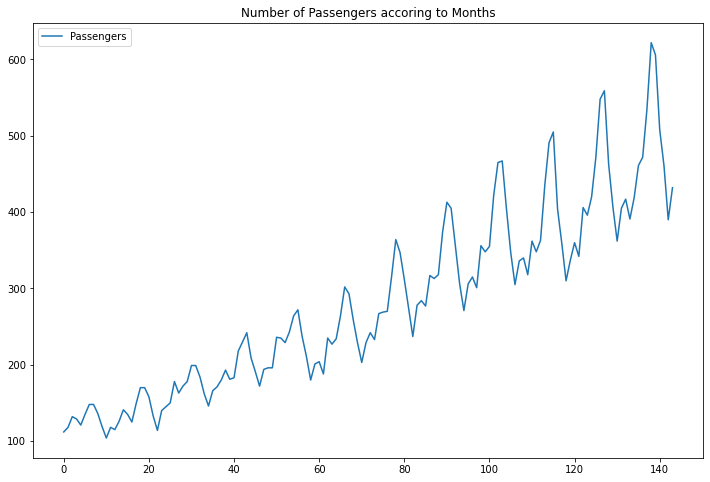

In [3]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df)
plt.title("Number of Passengers accoring to Months")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df.shape

(144, 2)

In [7]:
dataframe = pd.read_csv('data.csv', usecols=[1], engine='python')
dataset = dataframe.values

In [11]:
dataset[:5]

array([[112],
       [118],
       [132],
       [129],
       [121]])

In [12]:
dataset.shape

(144, 1)

In [8]:
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [9]:
dataset[:5]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]], dtype=float32)

### Splitting Data into Training & Testing

In [10]:
dataset.shape

(144, 1)

In [11]:
train_size=len(dataset)*0.65
print(train_size)

93.60000000000001


In [12]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [13]:
train[86:]

array([[0.41119692],
       [0.4034749 ],
       [0.4131274 ],
       [0.52123547],
       [0.5965251 ],
       [0.58108103],
       [0.484556  ],
       [0.3899614 ],
       [0.3223938 ],
       [0.3899614 ]], dtype=float32)

In [14]:
test[:10]

array([[0.4073359 ],
       [0.3803089 ],
       [0.48648646],
       [0.47104248],
       [0.484556  ],
       [0.6138996 ],
       [0.6969112 ],
       [0.70077217],
       [0.57915056],
       [0.46911195]], dtype=float32)

Now before training the data on the LSTM model, we need to prepare the data so that we can fit it on the model, for this task we will define a helper function:

### Converting Array of Matrix -> Dataset Matrix

In [15]:
def create_dataset(timeseries_data, n_features):
    X= []
    y = []
    for i in range(len(timeseries_data)):
        #find the end of this pattern
        end_ix = i + n_features
        
        #check if we are beyond the sequence
        if end_ix > len(timeseries_data) -1:
            break
            
        #gather input and output of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)  

In [16]:
n_steps = 20   
X, y = create_dataset(train, n_steps)
testX, testY = create_dataset(test, n_steps)

In [17]:
X[:3]

array([[[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104],
        [0.07142857],
        [0.05984557],
        [0.04054055],
        [0.08687258],
        [0.12741312],
        [0.12741312]],

       [[0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104],
        [0.07142857],
        [0.05984557],
        [0.04054055],
        [0.08687258],
        [0.12741312],
        [0.12741312],
        [0.10424709]],

       [[0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
      

In [18]:
y[:2]

array([[0.10424709],
       [0.05598456]], dtype=float32)

In [19]:
X.shape

(76, 20, 1)

--------

## Linear Regression Model

In [20]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step =20
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [22]:
X_train.shape

(75, 20)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model_lr = LinearRegression()

In [26]:
model_lr.fit(X_train, y_train)

LinearRegression()

### Predictions & Model Evaluation

In [27]:
predictions_lr = model_lr.predict(X_test)

In [28]:
predictions_lr

array([0.6457977 , 0.47436142, 0.41465318, 0.47192568, 0.4891833 ,
       0.4411527 , 0.54945356, 0.56010014, 0.60533136, 0.757915  ,
       0.86089796, 0.8703064 , 0.68827254, 0.569573  , 0.47708547,
       0.53541166, 0.62259525, 0.57389516, 0.669357  , 0.6271772 ,
       0.731539  , 0.84831136, 0.9784041 , 0.99665207, 0.7951873 ,
       0.6566749 , 0.5915758 ], dtype=float32)

In [29]:
y_test

array([0.57915056, 0.492278  , 0.3976834 , 0.44980696, 0.49420848,
       0.45945945, 0.5830116 , 0.5637065 , 0.61003864, 0.71042466,
       0.8571429 , 0.8783784 , 0.69305015, 0.5849421 , 0.4980695 ,
       0.58108103, 0.6042471 , 0.554054  , 0.60810804, 0.6891892 ,
       0.71042466, 0.8320464 , 1.        , 0.96911204, 0.7799227 ,
       0.6891892 , 0.55212355], dtype=float32)

In [30]:
print("Accuracy on training set",model_lr.score(X_train, y_train))

Accuracy on training set 0.9833235713366947


In [31]:
print("Accuracy on Testing set",model_lr.score(X_test, y_test))

Accuracy on Testing set 0.9606967080497087


In [32]:
predictions_lr.shape, y_test.shape

((27,), (27,))

In [33]:
pred_df=pd.DataFrame(predictions_lr, y_test).reset_index()

In [34]:
pred_df_new = pred_df.rename(columns={'index': 'Predictions', 0: 'True_values'})

In [35]:
pred_df_new.head()

,Predictions,True_values
0,0.579151,0.645798
1,0.492278,0.474361
2,0.397683,0.414653
3,0.449807,0.471926
4,0.494208,0.489183


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Predictions VS True Values on Testng set')

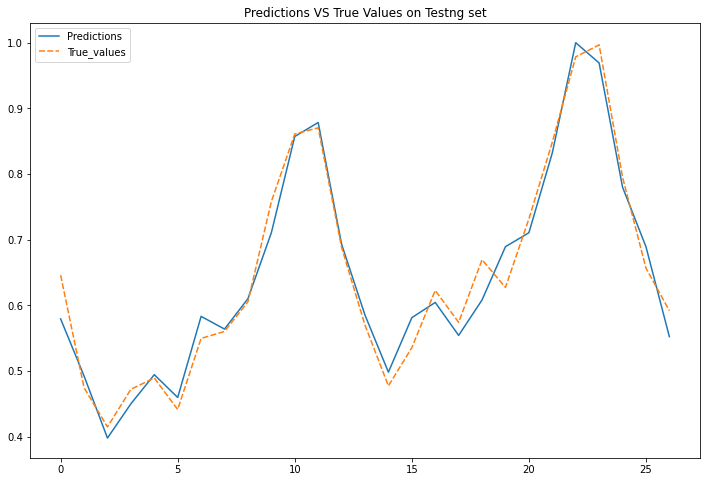

In [37]:
plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testng set")

---------

## LSTM Model

#### Reshape from [samples, timesteps] into [samples, timesteps, features]

In [38]:
n_features = 1
X= X.reshape((X.shape[0], X.shape[1], n_features))

In [39]:
X.shape

(76, 20, 1)

### Build the Model

In [40]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape = (n_steps, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss= 'mse')

In [41]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape = (n_steps, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss= 'mse')

In [42]:
predictions=model.predict(X)

3/3 [==============================] - 0s 4ms/step


In [43]:
predictions.shape

(76, 1)

In [44]:
y.shape

(76, 1)

In [45]:
print("Expected Value:",y[10][0])
print('Predicted Value:',predictions[10][0])

Expected Value: 0.18339768
Predicted Value: 0.0016250048


### Predictions for Test Data

In [46]:
n_features = 1
testX= testX.reshape((testX.shape[0], testX.shape[1], n_features))

In [47]:
test_predictions=model.predict(testX)

1/1 [==============================] - 0s 17ms/step


In [48]:
print('Expected value:',testY[10][0])
print('Predicted value:',test_predictions[10][0])

Expected value: 0.8571429
Predicted value: 0.0065408736


### Predict for 10 Days

We are using last 20 days input for 1 day

In [49]:
test.shape
x_input= test[28:]

In [50]:
# x_input=testX[38:]

In [51]:
x_input.shape

(20, 1)

In [52]:
x_input = x_input.reshape(1, -1)

In [53]:
x_input.shape

(1, 20)

In [54]:
temp_input= list(x_input)
temp_input = temp_input[0].tolist()

In [55]:
len(temp_input)

20

In [56]:
import numpy as np
import pandas as pd

lst_output = []
n_steps = 20
i = 0

output_table = []

while i < 10:
    if len(temp_input) > 20:
        x_input = np.array(temp_input[1:])
        print("{} day input: {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output: {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        
        output_table.append([i, yhat[0]])
        
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        
        output_table.append([i, yhat[0]])
        
        i += 1

print(lst_output)

[0.00855244]
1 day input: [0.71042466 0.85714293 0.87837839 0.69305015 0.5849421  0.49806949
 0.58108103 0.60424709 0.55405402 0.60810804 0.6891892  0.71042466
 0.83204639 1.         0.96911204 0.77992272 0.6891892  0.55212355
 0.63320458 0.00855244]
1 day output: [[0.00640547]]
2 day input: [0.85714293 0.87837839 0.69305015 0.5849421  0.49806949 0.58108103
 0.60424709 0.55405402 0.60810804 0.6891892  0.71042466 0.83204639
 1.         0.96911204 0.77992272 0.6891892  0.55212355 0.63320458
 0.00855244 0.00640547]
2 day output: [[0.00379911]]
3 day input: [0.87837839 0.69305015 0.5849421  0.49806949 0.58108103 0.60424709
 0.55405402 0.60810804 0.6891892  0.71042466 0.83204639 1.
 0.96911204 0.77992272 0.6891892  0.55212355 0.63320458 0.00855244
 0.00640547 0.00379911]
3 day output: [[0.00125188]]
4 day input: [0.69305015 0.5849421  0.49806949 0.58108103 0.60424709 0.55405402
 0.60810804 0.6891892  0.71042466 0.83204639 1.         0.96911204
 0.77992272 0.6891892  0.55212355 0.63320458 0.

In [57]:
# Create a table using pandas
df = pd.DataFrame(output_table, columns=["Day Number", "Prediction"])
print(df)

   Day Number        Prediction
0           0     [0.008552442]
1           1    [0.0064054746]
2           2     [0.003799106]
3           3    [0.0012518787]
4           4  [-0.00091136806]
5           5   [-0.0026383698]
6           6   [-0.0038661028]
7           7    [-0.004647415]
8           8    [-0.004977611]
9           9    [-0.004985574]


In [58]:
day_new= np.arange(1,49)
day_pred = np.arange(50, 60)

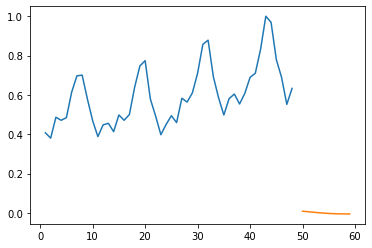

In [59]:
plt.plot(day_new,test)
plt.plot(day_pred,lst_output)

In [60]:
test[35:]

array([[0.58108103],
       [0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ],
       [0.55212355],
       [0.6332046 ]], dtype=float32)

In [61]:
lst_output

[[0.00855244230479002],
 [0.006405474618077278],
 [0.0037991059944033623],
 [0.0012518786825239658],
 [-0.0009113680571317673],
 [-0.0026383697986602783],
 [-0.0038661027792841196],
 [-0.00464741513133049],
 [-0.004977610893547535],
 [-0.004985574167221785]]

## Model #2: GRU

In [91]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import Adam


In [92]:

data = pd.read_csv('data.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
scaler = MinMaxScaler(feature_range=(0, 1))
data['Passengers'] = scaler.fit_transform(data[['Passengers']])



In [93]:
data.head()

,Passengers
Month,
1949-01-01,0.015444
1949-02-01,0.027027
1949-03-01,0.054054
1949-04-01,0.048263
1949-05-01,0.032819


In [94]:
# Function to create a dataset with look-back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Convert the dataframe to a numpy array
dataset = data.values

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Create the datasets with look-back
look_back = 5 
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))


In [95]:
model = Sequential()
model.add(GRU(50, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
model.add(GRU(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 5, 50)             7950      
                                                                 
 gru_7 (GRU)                 (None, 50)                15300     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23,301
Trainable params: 23,301
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)


Epoch 1/100
3/3 - 2s - loss: 0.0708 - 2s/epoch - 640ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0545 - 11ms/epoch - 4ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0441 - 13ms/epoch - 4ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0348 - 11ms/epoch - 4ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0258 - 10ms/epoch - 3ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0184 - 11ms/epoch - 4ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0127 - 12ms/epoch - 4ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0102 - 11ms/epoch - 4ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0103 - 10ms/epoch - 3ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0101 - 12ms/epoch - 4ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0090 - 11ms/epoch - 4ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0081 - 11ms/epoch - 4ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0078 - 10ms/epoch - 3ms/step
Epoch 14/100
3/3 - 0s - loss: 0.0074 - 12ms/epoch - 4ms/step
Epoch 15/100
3/3 - 0s - loss: 0.0066 - 12ms/epoch - 4ms/step
Epoch 16/100
3/3 - 0s - loss: 0.0061 - 11ms/epoch - 4ms/step
Epoch 17/100
3/3 - 0s - loss: 0.0

In [97]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverse transform the predictions and actual values
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(-1, 1))

# RMSE
trainScore = np.sqrt(np.mean((trainPredict - trainY) ** 2))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(np.mean((testPredict - testY) ** 2))
print('Test Score: %.2f RMSE' % (testScore))


2/2 [==============================] - 0s 2ms/step
Train Score: 26.59 RMSE
Test Score: 56.58 RMSE


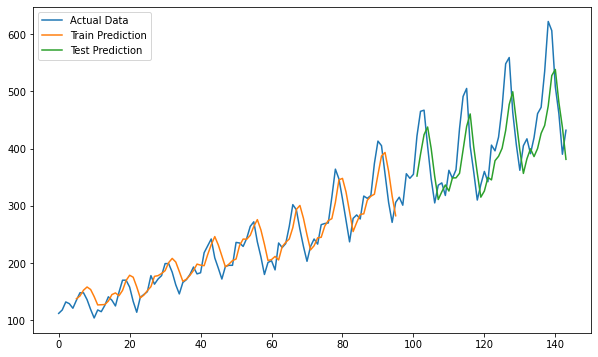

In [98]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2):len(dataset), :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(dataset), label='Actual Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.show()


## Model 3: XGBOOST

In [100]:
!pip install xgboost


   ---------------------------------------- 99.8/99.8 MB 3.4 MB/s eta 0:00:00


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
from xgboost import XGBRegressor
data = pd.read_csv('data.csv')

# Convert the month to datetime
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
scaler = MinMaxScaler(feature_range=(0, 1))
data['Passengers'] = scaler.fit_transform(data[['Passengers']])

# Convert the dataframe to a numpy array
dataset = data.values

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

look_back = 5 
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))


preparing and trainning the model

In [116]:
# Flattenning data
trainX_flat = trainX.reshape(trainX.shape[0], -1)
testX_flat = testX.reshape(testX.shape[0], -1)


In [117]:
# xg boost with tuned parameters
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8
)
model.fit(trainX_flat, trainY, early_stopping_rounds=10, eval_set=[(testX_flat, testY)], verbose=True)


[0]	validation_0-rmse:0.41849
[1]	validation_0-rmse:0.41635
[2]	validation_0-rmse:0.41441
[3]	validation_0-rmse:0.41248
[4]	validation_0-rmse:0.41040
[5]	validation_0-rmse:0.40839
[6]	validation_0-rmse:0.40646
[7]	validation_0-rmse:0.40440
[8]	validation_0-rmse:0.40232
[9]	validation_0-rmse:0.40025
[10]	validation_0-rmse:0.39919
[11]	validation_0-rmse:0.39728
[12]	validation_0-rmse:0.39645
[13]	validation_0-rmse:0.39456
[14]	validation_0-rmse:0.39264
[15]	validation_0-rmse:0.39083
[16]	validation_0-rmse:0.38897
[17]	validation_0-rmse:0.38782
[18]	validation_0-rmse:0.38592
[19]	validation_0-rmse:0.38481
[20]	validation_0-rmse:0.38314
[21]	validation_0-rmse:0.38264
[22]	validation_0-rmse:0.38075
[23]	validation_0-rmse:0.37900
[24]	validation_0-rmse:0.37734
[25]	validation_0-rmse:0.37554
[26]	validation_0-rmse:0.37482
[27]	validation_0-rmse:0.37398
[28]	validation_0-rmse:0.37234
[29]	validation_0-rmse:0.37075
[30]	validation_0-rmse:0.36915
[31]	validation_0-rmse:0.36826
[32]	validation_0-

C:\Users\saeed\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[136]	validation_0-rmse:0.29260
[137]	validation_0-rmse:0.29229
[138]	validation_0-rmse:0.29149
[139]	validation_0-rmse:0.29121
[140]	validation_0-rmse:0.29062
[141]	validation_0-rmse:0.29034
[142]	validation_0-rmse:0.29015
[143]	validation_0-rmse:0.28926
[144]	validation_0-rmse:0.28843
[145]	validation_0-rmse:0.28826
[146]	validation_0-rmse:0.28791
[147]	validation_0-rmse:0.28760
[148]	validation_0-rmse:0.28738
[149]	validation_0-rmse:0.28665
[150]	validation_0-rmse:0.28627
[151]	validation_0-rmse:0.28592
[152]	validation_0-rmse:0.28520
[153]	validation_0-rmse:0.28469
[154]	validation_0-rmse:0.28378
[155]	validation_0-rmse:0.28346
[156]	validation_0-rmse:0.28266
[157]	validation_0-rmse:0.28195
[158]	validation_0-rmse:0.28175
[159]	validation_0-rmse:0.28145
[160]	validation_0-rmse:0.28125
[161]	validation_0-rmse:0.28100
[162]	validation_0-rmse:0.28074
[163]	validation_0-rmse:0.28042
[164]	validation_0-rmse:0.27976
[165]	validation_0-rmse:0.27952
[166]	validation_0-rmse:0.27897
[167]	va

[393]	validation_0-rmse:0.24302
[394]	validation_0-rmse:0.24287
[395]	validation_0-rmse:0.24284
[396]	validation_0-rmse:0.24281
[397]	validation_0-rmse:0.24265
[398]	validation_0-rmse:0.24261
[399]	validation_0-rmse:0.24258
[400]	validation_0-rmse:0.24241
[401]	validation_0-rmse:0.24220
[402]	validation_0-rmse:0.24199
[403]	validation_0-rmse:0.24195
[404]	validation_0-rmse:0.24191
[405]	validation_0-rmse:0.24187
[406]	validation_0-rmse:0.24184
[407]	validation_0-rmse:0.24180
[408]	validation_0-rmse:0.24178
[409]	validation_0-rmse:0.24159
[410]	validation_0-rmse:0.24156
[411]	validation_0-rmse:0.24153
[412]	validation_0-rmse:0.24150
[413]	validation_0-rmse:0.24138
[414]	validation_0-rmse:0.24126
[415]	validation_0-rmse:0.24114
[416]	validation_0-rmse:0.24094
[417]	validation_0-rmse:0.24088
[418]	validation_0-rmse:0.24084
[419]	validation_0-rmse:0.24082
[420]	validation_0-rmse:0.24079
[421]	validation_0-rmse:0.24073
[422]	validation_0-rmse:0.24070
[423]	validation_0-rmse:0.24067
[424]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Make predictions and inverse transform the results

In [118]:
# Make predictions
trainPredict = model.predict(trainX_flat)
testPredict = model.predict(testX_flat)
trainPredict = scaler.inverse_transform(trainPredict.reshape(-1, 1))
trainY = scaler.inverse_transform(trainY.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 1))
testY = scaler.inverse_transform(testY.reshape(-1, 1))

# Calculate root mean squared error
trainScore = np.sqrt(np.mean((trainPredict - trainY) ** 2))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(np.mean((testPredict - testY) ** 2))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 5.21 RMSE
Test Score: 123.14 RMSE


Plot the results

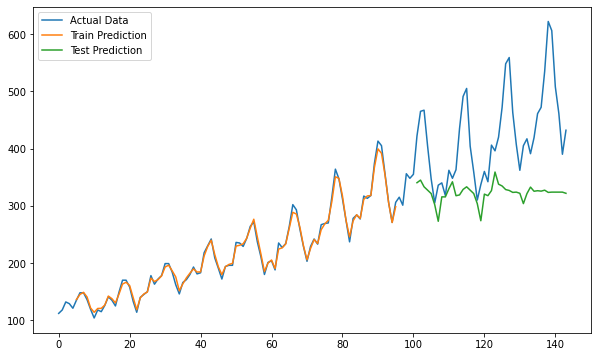

In [119]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2):len(dataset), :] = testPredict
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(dataset), label='Actual Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.show()


## Model 4 : CNN

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

In [167]:

# Normalize the passengers column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Passengers'] = scaler.fit_transform(data[['Passengers']])

data.head()


,Passengers
Month,
1949-01-01,0.015444
1949-02-01,0.027027
1949-03-01,0.054054
1949-04-01,0.048263
1949-05-01,0.032819


In [170]:
# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, n_features)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 9, 64)             192       
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dense_17 (Dense)            (None, 50)                28850     
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 29,093
Trainable params: 29,093
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)


Epoch 1/100
3/3 - 0s - loss: 0.0158 - 411ms/epoch - 137ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0076 - 4ms/epoch - 1ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0059 - 5ms/epoch - 2ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0050 - 6ms/epoch - 2ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0050 - 6ms/epoch - 2ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0036 - 7ms/epoch - 2ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0037 - 6ms/epoch - 2ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0038 - 6ms/epoch - 2ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0030 - 6ms/epoch - 2ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0031 - 5ms/epoch - 2ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0030 - 6ms/epoch - 2ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0025 - 5ms/epoch - 2ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0026 - 6ms/epoch - 2ms/step
Epoch 14/100
3/3 - 0s - loss: 0.0024 - 5ms/epoch - 2ms/step
Epoch 15/100
3/3 - 0s - loss: 0.0022 - 7ms/epoch - 2ms/step
Epoch 16/100
3/3 - 0s - loss: 0.0021 - 5ms/epoch - 2ms/step
Epoch 17/100
3/3 - 0s - loss: 0.0020 - 5ms/ep

In [142]:
# predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverse transform the predictions and actual values
trainPredict = scaler.inverse_transform(trainPredict.reshape(-1, 1))
trainY = scaler.inverse_transform(trainY.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 1))
testY = scaler.inverse_transform(testY.reshape(-1, 1))

#RMSE
trainScore = np.sqrt(np.mean((trainPredict - trainY) ** 2))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(np.mean((testPredict - testY) ** 2))
print('Test Score: %.2f RMSE' % (testScore))


2/2 [==============================] - 0s 2ms/step
Train Score: 11.24 RMSE
Test Score: 28.22 RMSE


In [146]:
actual_passengers = scaler.inverse_transform(data['Passengers'].values.reshape(-1, 1))
print("Last 10 actual passenger numbers:\n", actual_passengers[-10:])


Last 10 actual passenger numbers:
 [[419.]
 [461.]
 [472.]
 [535.]
 [622.]
 [606.]
 [508.]
 [461.]
 [390.]
 [432.]]


In [147]:
last_values = dataset[-look_back:].reshape(1, look_back, n_features)
predictions = []

for _ in range(10):
    pred = model.predict(last_values)
    predictions.append(pred[0, 0])
    last_values = np.append(last_values[:, 1:, :], pred.reshape(1, 1, n_features), axis=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

print("Next 10 days predictions:", predictions)


1/1 [==============================] - 0s 14ms/step
Next 10 days predictions: [[477.13434]
 [484.75073]
 [514.46643]
 [538.9279 ]
 [587.6887 ]
 [646.401  ]
 [656.4736 ]
 [612.6959 ]
 [522.36835]
 [466.7345 ]]


so the prediction are reasonable that means the model is good

## Model 5 : LSTM Attention

In [155]:
from tensorflow.keras.layers import Dense, LSTM, Input, Multiply, Permute, Concatenate, Flatten, Dropout
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential, Model

In [171]:
scaler = MinMaxScaler(feature_range=(0, 1))
data['Passengers'] = scaler.fit_transform(data[['Passengers']])

data.head()

,Passengers
Month,
1949-01-01,0.015444
1949-02-01,0.027027
1949-03-01,0.054054
1949-04-01,0.048263
1949-05-01,0.032819


In [172]:
# Function to create a dataset with look-back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

dataset = data.values
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[:train_size], dataset[train_size:]

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], 1))
testX = testX.reshape((testX.shape[0], testX.shape[1], 1))


Define the attention mechanism

In [173]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        self.u = self.add_weight(name='context_vector', shape=(input_shape[-1],),
                                 initializer='random_normal', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        uit = K.tanh(K.dot(x, self.W) + self.b)
        ait = K.exp(K.dot(uit, K.expand_dims(self.u, -1)))
        ait = ait / (K.sum(ait, axis=1, keepdims=True) + K.epsilon())
        ait = K.squeeze(ait, -1)
        weighted_input = x * K.expand_dims(ait, -1)
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])


In [174]:
def build_lstm_attention_model(input_shape):
    inputs = Input(shape=input_shape)
    lstm_out = LSTM(50, return_sequences=True)(inputs)
    lstm_out = Dropout(0.2)(lstm_out)
    lstm_out = LSTM(50, return_sequences=True)(lstm_out)
    lstm_out = Dropout(0.2)(lstm_out)
    attention_out = AttentionLayer()(lstm_out)
    dense_out = Dense(1)(attention_out)
    model = Model(inputs=[inputs], outputs=[dense_out])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

input_shape = (look_back, 1)
model = build_lstm_attention_model(input_shape)
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_10 (LSTM)              (None, 10, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 10, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 10, 50)            0         
                                                                 
 attention_layer_5 (Attentio  (None, 50)               2600      
 nLayer)                                                         
                                                           

In [175]:
history = model.fit(trainX, trainY, epochs=300, batch_size=32, validation_data=(testX, testY), verbose=2)


Epoch 1/300
3/3 - 4s - loss: 0.0619 - val_loss: 0.2942 - 4s/epoch - 1s/step
Epoch 2/300
3/3 - 0s - loss: 0.0407 - val_loss: 0.2002 - 41ms/epoch - 14ms/step
Epoch 3/300
3/3 - 0s - loss: 0.0224 - val_loss: 0.1097 - 41ms/epoch - 14ms/step
Epoch 4/300
3/3 - 0s - loss: 0.0108 - val_loss: 0.0422 - 40ms/epoch - 13ms/step
Epoch 5/300
3/3 - 0s - loss: 0.0117 - val_loss: 0.0256 - 41ms/epoch - 14ms/step
Epoch 6/300
3/3 - 0s - loss: 0.0151 - val_loss: 0.0288 - 41ms/epoch - 14ms/step
Epoch 7/300
3/3 - 0s - loss: 0.0105 - val_loss: 0.0426 - 43ms/epoch - 14ms/step
Epoch 8/300
3/3 - 0s - loss: 0.0089 - val_loss: 0.0620 - 43ms/epoch - 14ms/step
Epoch 9/300
3/3 - 0s - loss: 0.0091 - val_loss: 0.0708 - 43ms/epoch - 14ms/step
Epoch 10/300
3/3 - 0s - loss: 0.0090 - val_loss: 0.0679 - 43ms/epoch - 14ms/step
Epoch 11/300
3/3 - 0s - loss: 0.0091 - val_loss: 0.0570 - 42ms/epoch - 14ms/step
Epoch 12/300
3/3 - 0s - loss: 0.0082 - val_loss: 0.0430 - 42ms/epoch - 14ms/step
Epoch 13/300
3/3 - 0s - loss: 0.0071 - va

Epoch 103/300
3/3 - 0s - loss: 0.0057 - val_loss: 0.0285 - 43ms/epoch - 14ms/step
Epoch 104/300
3/3 - 0s - loss: 0.0055 - val_loss: 0.0268 - 41ms/epoch - 14ms/step
Epoch 105/300
3/3 - 0s - loss: 0.0058 - val_loss: 0.0260 - 41ms/epoch - 14ms/step
Epoch 106/300
3/3 - 0s - loss: 0.0060 - val_loss: 0.0268 - 46ms/epoch - 15ms/step
Epoch 107/300
3/3 - 0s - loss: 0.0057 - val_loss: 0.0282 - 40ms/epoch - 13ms/step
Epoch 108/300
3/3 - 0s - loss: 0.0056 - val_loss: 0.0271 - 42ms/epoch - 14ms/step
Epoch 109/300
3/3 - 0s - loss: 0.0055 - val_loss: 0.0269 - 40ms/epoch - 13ms/step
Epoch 110/300
3/3 - 0s - loss: 0.0058 - val_loss: 0.0276 - 40ms/epoch - 13ms/step
Epoch 111/300
3/3 - 0s - loss: 0.0054 - val_loss: 0.0276 - 41ms/epoch - 14ms/step
Epoch 112/300
3/3 - 0s - loss: 0.0058 - val_loss: 0.0267 - 41ms/epoch - 14ms/step
Epoch 113/300
3/3 - 0s - loss: 0.0055 - val_loss: 0.0278 - 42ms/epoch - 14ms/step
Epoch 114/300
3/3 - 0s - loss: 0.0056 - val_loss: 0.0290 - 49ms/epoch - 16ms/step
Epoch 115/300
3/

Epoch 203/300
3/3 - 0s - loss: 0.0058 - val_loss: 0.0295 - 42ms/epoch - 14ms/step
Epoch 204/300
3/3 - 0s - loss: 0.0058 - val_loss: 0.0296 - 43ms/epoch - 14ms/step
Epoch 205/300
3/3 - 0s - loss: 0.0058 - val_loss: 0.0299 - 42ms/epoch - 14ms/step
Epoch 206/300
3/3 - 0s - loss: 0.0056 - val_loss: 0.0327 - 42ms/epoch - 14ms/step
Epoch 207/300
3/3 - 0s - loss: 0.0057 - val_loss: 0.0332 - 42ms/epoch - 14ms/step
Epoch 208/300
3/3 - 0s - loss: 0.0057 - val_loss: 0.0310 - 42ms/epoch - 14ms/step
Epoch 209/300
3/3 - 0s - loss: 0.0057 - val_loss: 0.0291 - 42ms/epoch - 14ms/step
Epoch 210/300
3/3 - 0s - loss: 0.0056 - val_loss: 0.0286 - 43ms/epoch - 14ms/step
Epoch 211/300
3/3 - 0s - loss: 0.0054 - val_loss: 0.0304 - 41ms/epoch - 14ms/step
Epoch 212/300
3/3 - 0s - loss: 0.0057 - val_loss: 0.0308 - 41ms/epoch - 14ms/step
Epoch 213/300
3/3 - 0s - loss: 0.0058 - val_loss: 0.0302 - 42ms/epoch - 14ms/step
Epoch 214/300
3/3 - 0s - loss: 0.0054 - val_loss: 0.0299 - 41ms/epoch - 14ms/step
Epoch 215/300
3/

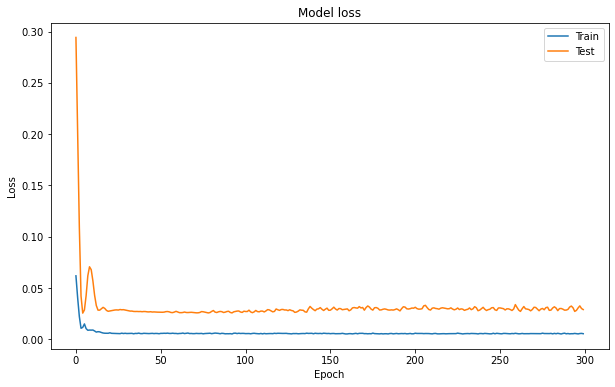

In [176]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [177]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverse transform the predictions and actual values
trainPredict = scaler.inverse_transform(trainPredict.reshape(-1, 1))
trainY = scaler.inverse_transform(trainY.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 1))
testY = scaler.inverse_transform(testY.reshape(-1, 1))

# RMSE
trainScore = np.sqrt(np.mean((trainPredict - trainY) ** 2))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(np.mean((testPredict - testY) ** 2))
print('Test Score: %.2f RMSE' % (testScore))


2/2 [==============================] - 0s 3ms/step
Train Score: 0.07 RMSE
Test Score: 0.17 RMSE


Plotting result

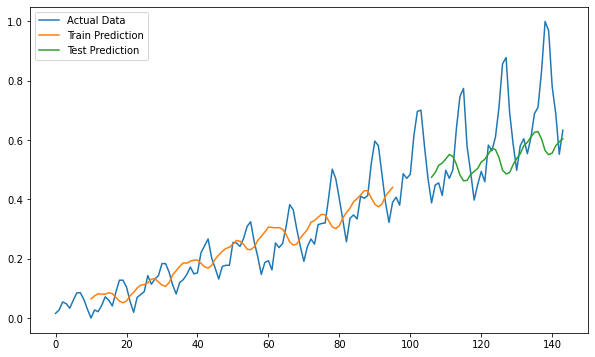

In [178]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2):len(dataset), :] = testPredict
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(dataset), label='Actual Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.show()


comparing last few days to the next 10 days

In [179]:
# Prediction
last_values = dataset[-look_back:].reshape(1, look_back, 1)
predictions = []

for _ in range(10):
    pred = model.predict(last_values)
    predictions.append(pred[0, 0])
    last_values = np.append(last_values[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print("Next 10 days predictions:\n", predictions)

# last days
actual_passengers = scaler.inverse_transform(data['Passengers'].values.reshape(-1, 1))
print("Last 10 actual passenger numbers:\n", actual_passengers[-10:])


1/1 [==============================] - 0s 15ms/step
Next 10 days predictions:
 [[0.62829345]
 [0.649402  ]
 [0.66272646]
 [0.67818147]
 [0.6777298 ]
 [0.64491016]
 [0.60243326]
 [0.58053744]
 [0.5689641 ]
 [0.5822997 ]]
Last 10 actual passenger numbers:
 [[0.60810811]
 [0.68918919]
 [0.71042471]
 [0.83204633]
 [1.        ]
 [0.96911197]
 [0.77992278]
 [0.68918919]
 [0.55212355]
 [0.63320463]]


This is a very good model with a low RMSE